# Bibliotecas <h1>

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [ ]:
%matplotlib inline

#Lendo os dados

In [ ]:
df = pd.read_excel('report_transactions.xlsx')

## Informações diponíveis dos dados

* buy_timestamp: quando aconteceu a primeira compra do conjunto de transações
* buy_price: preço pago por uma unidade da criptomoeda na primeira compra (é possível comprar frações)
* batch_invested_amount: total investido em dólares em todas as compras realizadas
* asset_amount: fração da criptomoeda adquirido com a quantidade em dólares investida
* buyTimes: quantas vezes aconteceram compras antes de se realizar a venda
* sell_timestamp: quando aconteceu a venda (zerar posição)
* sell_price: preço pelo qual foi vendido
* minimal_roi: nome da estratégia utilizada para fazer a venda
* result: resultado após a venda (lucro ou prejuízo em dólares)
* total_wallet: total da carteira após o conjunto de transações ter sido efetivado

In [ ]:
df.head()

,buy_timestamp,buy_price,batch_invested_amount,asset_amount,buyTimes,sell_timestamp,sell_price,minimal_roi,result,total_wallet
0,2019-06-01 05:02:00,8531.38,100,0.011721,1,2019-06-01 06:45:00,8531.79,sell_condition 0,0.004806,10000.00
1,2019-06-02 05:18:00,8562.20,100,0.011679,1,2019-06-02 06:03:00,8589.49,sell_condition 0,0.318726,10000.32
2,2019-06-02 16:03:00,8647.12,100,0.011565,1,2019-06-02 16:48:00,8682.53,sell_condition 0,0.409501,10000.73
3,2019-06-03 08:52:00,8478.01,100,0.011795,1,2019-06-03 09:41:00,8481.00,sell_condition 0,0.035268,10000.77
4,2019-06-04 01:39:00,7990.12,100,0.012515,1,2019-06-04 02:24:00,8012.55,sell_condition 0,0.280722,10001.05


###Qual foi o dia de compra do conjunto de transações mais lucrativo?

In [ ]:
data = df.copy()
data['buy_timestamp'] = pd.to_datetime(df['buy_timestamp']).dt.date
lucros = data.groupby(['buy_timestamp'])['result'].sum().sort_values(ascending=False)
dado = data[data.buy_timestamp == lucros.index[0]]
dado

,buy_timestamp,buy_price,batch_invested_amount,asset_amount,buyTimes,sell_timestamp,sell_price,minimal_roi,result,total_wallet
251,2019-12-04,7161.30,100,0.013964,1,2019-12-04 01:22:00,7176.07,sell_condition 0,0.206247,9996.98
252,2019-12-04,7135.80,120,0.016833,2,2019-12-04 08:26:00,7140.06,sell_condition 0,0.186718,9997.17
253,2019-12-04,7474.32,220,0.029824,7,2019-12-06 17:54:00,7546.00,sell_condition 0,5.048166,10002.22


###Qual o total de resultado por estratégia para fazer a venda?


In [ ]:
total = df.groupby(['minimal_roi'])['result'].sum().sort_values(ascending=False)
total

minimal_roi
sell_condition 0        257.565530
sell_condition 0.015     15.245004
stoploss               -208.328298
Name: result, dtype: float64

###Qual foi o conjunto de transações com mais compras?

In [ ]:
TotCompras = df.buyTimes.max()
dado = data[data.buyTimes == TotCompras]
dado

,buy_timestamp,buy_price,batch_invested_amount,asset_amount,buyTimes,sell_timestamp,sell_price,minimal_roi,result,total_wallet
143,2019-09-06,10582.9,320,0.030849,12,2019-09-11 06:52:00,9887.93,stoploss,-14.966332,10002.36


###Distribuição da quantidade de compras antes da venda

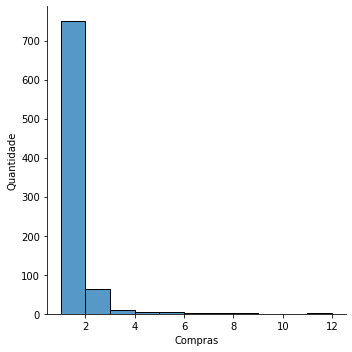

In [ ]:
sns.displot(df['buyTimes'])
plt.xlabel('Compras')
plt.ylabel('Quantidade')
plt.show()

####Lucros por mês

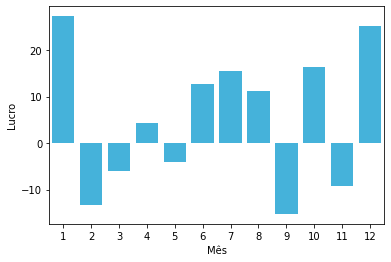

In [ ]:
data = df.copy()
data['buy_timestamp'] = pd.to_datetime(df['buy_timestamp']).dt.month
total = data.groupby(['buy_timestamp'])['result'].sum().sort_index()

sns.barplot(x=total.index,y=total.values, color='#2CBDF3')
plt.xlabel('Mês')
plt.ylabel('Lucro')
plt.show()

###Distribuição do total investido

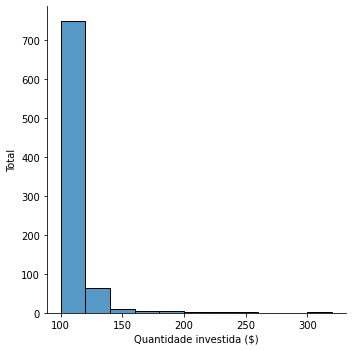

In [ ]:
sns.displot(df['batch_invested_amount'])
plt.xlabel('Quantidade investida ($)')
plt.ylabel('Total')
plt.show()